<a href="https://colab.research.google.com/github/raoram0266/RL-_NCU403/blob/main/BABY%20ROBOT%20PART%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np

class PowerSocket:
    """The base power socket class"""
    def __init__(self, q):
        self.q = q  # the true reward value
        self.initialize()  # reset the socket

    def initialize(self):
        self.Q = 0  # the estimate of this socket's reward value
        self.n = 0  # the number of times this socket has been tried

    def charge(self):
        """Return a random amount of charge"""
        # the reward is a Gaussian distribution with unit variance around
        # the true value 'q'
        value = np.random.randn() + self.q
        # never allow a charge less than 0 to be returned
        return 0 if value < 0 else value

    def update(self, R):
        """Update this socket after it has returned reward value 'R'"""
        # increment the number of times this socket has been tried
        self.n += 1
        # the new estimate of the mean is calculated from the old estimate
        self.Q = (1 - 1.0 / self.n) * self.Q + (1.0 / self.n) * R

    def sample(self):
        """Return an estimate of the socket's reward value"""
        return self.Q


In [20]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize

# Assuming you have the corrected PowerSocket class defined here

# create 5 sockets in a fixed order
socket_order = [2, 1, 3, 5, 4]
# create the sockets
sockets = [PowerSocket((q*2)+2) for q in socket_order]
# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to
# get smooth plots of socket output
TOTAL_STEPS = 100000
# rewards will contain the charge returned at all of the time steps for
# each socket
rewards = np.zeros(shape=(TOTAL_STEPS, NUM_SOCKETS))

# iterate through each of the sockets
for socket_number, socket in enumerate(sockets):
    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS):
        rewards[t, socket_number] = socket.charge()


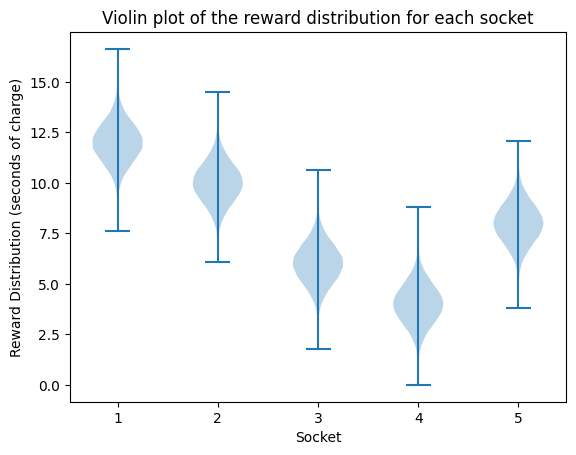

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the corrected PowerSocket class defined here

# create 5 sockets in a fixed order
socket_order = [5, 4, 2, 1, 3]
# create the sockets
sockets = [PowerSocket((q*2)+2) for q in socket_order]
# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to
# get smooth plots of socket output
TOTAL_STEPS = 100000
# rewards will contain the charge returned at all of the time steps for
# each socket
rewards = np.zeros(shape=(TOTAL_STEPS, NUM_SOCKETS))

# iterate through each of the sockets
for socket_number, socket in enumerate(sockets):
    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS):
        rewards[t, socket_number] = socket.charge()

# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()


<ipython-input-22-22095aea1e5b>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(rewards[:, socket_number]), hist=False, kde=True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-22-22095aea1e5b>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

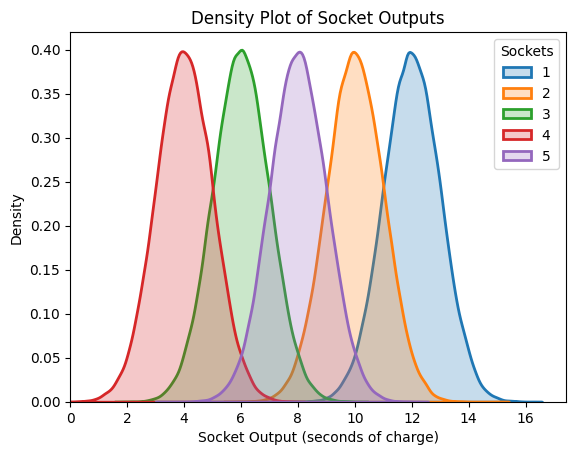

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the corrected PowerSocket class defined here

# create 5 sockets in a fixed order
socket_order = [5, 4, 2, 1, 3]
# create the sockets
sockets = [PowerSocket((q*2)+2) for q in socket_order]
# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to
# get smooth plots of socket output
TOTAL_STEPS = 100000
# rewards will contain the charge returned at all of the time steps for
# each socket
rewards = np.zeros(shape=(TOTAL_STEPS, NUM_SOCKETS))

# iterate through each of the sockets
for socket_number, socket in enumerate(sockets):
    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS):
        rewards[t, socket_number] = socket.charge()

# iterate through the sockets to draw each plot
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:, socket_number]), hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 2},
                 label=f'{socket_number+1}')

# Plot formatting
plt.xlim(0, None)
plt.legend(title='Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')

plt.show()


In [23]:
import random

class PowerSocket:
    def __init__(self, mean_value):
        self.mean_value = mean_value

    def charge(self):
        # Implement the charge logic here
        return random.uniform(0, 1)  # Example: Charging with a random reward

    def update(self, reward):
        # Implement the update logic here
        pass

def random_argmax(lst):
    max_val = max(lst)
    max_indices = [i for i, val in enumerate(lst) if val == max_val]
    return random.choice(max_indices)

class SocketTester:
    def __init__(self, socket=PowerSocket, socket_order=None, multiplier=2, **kwargs):
        self.sockets = [socket((q * multiplier) + 2, **kwargs) for q in socket_order]

    def charge_and_update(self, socket_index):
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

    def select_socket(self, t):
        socket_values = [socket.mean_value for socket in self.sockets]
        socket_index = random_argmax(socket_values)
        return socket_index

    def run(self, number_of_steps, maximum_total_reward=float('inf')):
        total_reward = 0
        for t in range(number_of_steps):
            socket_index = self.select_socket(t)
            self.charge_and_update(socket_index)
            total_reward += self.sockets[socket_index].mean_value

            if total_reward >= maximum_total_reward:
                break

        return total_reward

# Example usage
socket_order = [1, 2, 3, 4]  # Define your socket order
tester = SocketTester(socket_order=socket_order)

number_of_steps = 8
maximum_total_reward = 8.0
total_reward = tester.run(number_of_steps, maximum_total_reward)
print(f"Total reward after {number_of_steps} steps: {total_reward}")


Total reward after 8 steps: 10


In [24]:
def random_argmax(value_list):
  """ a random tie-breaking argmax"""
  values = np.asarray(value_list)
  return np.argmax(np.random.random(values.shape) * (values==values.max()))


In [25]:
class OptimisticSocket( PowerSocket ):
    def __init__( self, q, **kwargs ):

        # get the initial estimate from the kwargs
        self.initial_estimate = kwargs.pop('initial_estimate', 0.)

        # pass the true reward value to the base PowerSocket
        super().__init__(q)


    def initialize(self):
        # estimate of this socket's reward value
        # - set to supplied initial value
        self.Q = self.initial_estimate

        # the number of times this socket has been tried
        # - set to 1 if an initialisation value is supplied
        self.n = 1 if self.initial_estimate  > 0 else 0


In [27]:
import pandas as pd
import numpy as np

# Define the highlight_max_row_value function
def highlight_max_row_value(row):
    '''
    Highlight the maximum value in the row
    '''
    is_max = row == row.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Define the highlight_change_in_column function
def highlight_change_in_column(col):
    '''
    Highlight the entry before the column value changes
    '''
    style = [''] * col.shape[0]
    for i in range(col.shape[0] - 1):
        if col.iloc[i] != col.iloc[i + 1]:
            style[i] = 'background-color: yellow'
    return style

# Create a sample DataFrame
data = {
    1: [10, 5, 8, 12, 15],
    2: [5, 5, 5, 7, 8],
    3: [8, 8, 8, 6, 5],
    4: [12, 12, 12, 12, 12],
    5: [15, 15, 15, 15, 15],
}

df = pd.DataFrame(data)

# Apply the highlighting functions to the DataFrame
highlighted_df = df.style.apply(highlight_change_in_column, axis=0).apply(highlight_max_row_value, axis=1)

# Display the highlighted DataFrame
highlighted_df


,1,2,3,4,5
0,10,5,8,12,15
1,5,5,8,12,15
2,8,5,8,12,15
3,12,7,6,12,15
4,15,8,5,12,15


In [34]:
plt.figure(figsize=(10,8))

for socket in range(estimates.shape[1]):
    plt.plot(estimates[:30,socket], label = f'{socket+1}')

plt.plot(np.ones(30)*np.max(socket_means),'k', label = f'True value of socket 4')

plt.legend(title = 'Sockets')
plt.title('Optimistic Initialisation of Socket Outputs')
plt.xlabel('Time Steps')
plt.ylabel('Socket Reward Estimate')
Text(0, 0.5, 'Socket Reward Estimate')


NameError: ignored

<Figure size 1000x800 with 0 Axes>